
# Detecting LSB stego on color images (Mono version)
### Alberto García - intentodemusico
### Coach - Julián Miranda

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import MirandaAttributes
import shutil, os, random,cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.keras import layers, models, callbacks
from sklearn.model_selection import train_test_split, KFold

In [2]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# **1. Descargar y preparar conjunto de datos**

### Funciones anónimas para obtener las categorías de cada imágen

In [3]:
isStego=lambda x:1 if x[:6]=="stego_" else 0
getYFromImageList=lambda x: [isStego(element) for element in x]

In [4]:
folder="./MonoSamples/WOW_5/"

### Orden aleatorio del dataset

In [5]:
images=os.listdir(folder)
random.shuffle(images)
images=images[:2000]
print(len(images))

2000


### Obteniendo las categorías

In [6]:
y=np.array(getYFromImageList(images),dtype='float32')

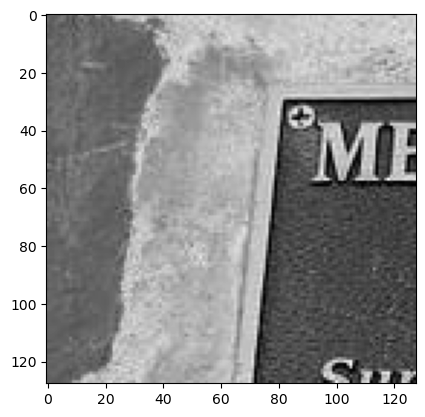

In [7]:
plt.imshow(mpimg.imread(folder+images[105]),cmap="gray")
plt.show()

as [  0   1   2   3 252 253 254 255]


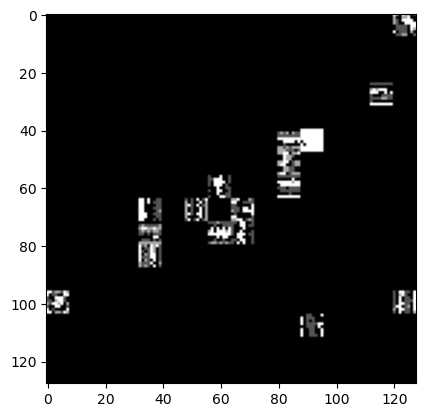

In [8]:
cover=mpimg.imread("cover1.JPEG")#[:,::-1]
stego=mpimg.imread("stego1.JPEG")#[:,::-1]
print("as",np.unique(cover-stego))
plt.imshow((cover-stego)*63,cmap='gray' )#(cover-stego)*255)#-stego)*255)
plt.show()

In [9]:
testShape=mpimg.imread(folder+images[1024]).shape
res=testShape[0] if testShape[1]==testShape[0] else "ERROR, DIFFERENT SIZE ON X AND Y"
channels=1 if len(testShape)<3 else 3
windowSize=16
windowCountPerAxe=res/windowSize

In [10]:
import time

### Obteniendo data de x 
##### (Extensive memory usage)

In [11]:
t = time.time()
x=np.array([ MirandaAttributes.attributes( mpimg.imread(folder+images[i]) ,windowSize)  for i in range(len(images))],dtype=np.float32)
elapsed = time.time() - t
print(elapsed)

141.65281009674072


In [12]:
import gc
gc.enable()
gc.garbage

[]

In [21]:
x=x.reshape(len(x),512,1)
print(x.shape)

(2000, 512, 1)


# **3. Base Convolucional**

#### Initializing K-Fold

In [15]:
kf = KFold(n_splits=5, shuffle=False)
acc_per_fold = []
loss_per_fold = []

In [16]:
[[y[i],images[i]] for i in range(1,10)]

[[0.0, '207_n03461385_11407.JPEG'],
 [1.0, 'stego_797_n02361337_8989.JPEG'],
 [0.0, '921_n03721384_5227.JPEG'],
 [0.0, '597_n01739381_623.JPEG'],
 [0.0, '331_n02111277_3634.JPEG'],
 [1.0, 'stego_109_n02106382_7277.JPEG'],
 [1.0, 'stego_120_n04590129_20811.JPEG'],
 [1.0, 'stego_79_n02102480_8088.JPEG'],
 [1.0, 'stego_207_n03461385_7083.JPEG']]

x=x.reshape(len(x),128,128,1)

In [17]:
x.shape

(2000, 512)

##### (Extensive memory usage)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/200
25/25 [==============================] - 112s 4s/step - loss: 7.4049 - accuracy: 0.4875 - f1_m: 0.6770 - precision_m: 0.5144 - recall_m: 1.0000 - val_loss: 7.6679 - val_accuracy: 0.5075 - val_f1_m: 0.6459 - val_precision_m: 0.4799 - val_recall_m: 1.0000
Epoch 2/200
25/25 [==============================] - 109s 4s/step - loss: 7.6698 - accuracy: 0.4856 - f1_m: 0.6784 - precision_m: 0.5144 - recall_m: 1.0000 - val_loss: 7.6679 - val_accuracy: 0.5075 - val_f1_m: 0.6459 - val_precision_m: 0.4799 - val_recall_m: 1.0000
Epoch 3/200
25/25 [==============================] - 107s 4s/step - loss: 7.6698 - accuracy: 0.4856 - f1_m: 0.6778 - precision_m: 0.5144 - recall_m: 1.0000 - val_loss: 7.6679 - val_accuracy: 0.5075 - val_f1_m: 0.6459 - val_precision_m: 0.4799 - val_recall_m: 1.0000
Epoch 4/200
25/25 [==============================] - 109s 4s/step - loss: 7.6698 - accuracy: 0.4856 - f1_

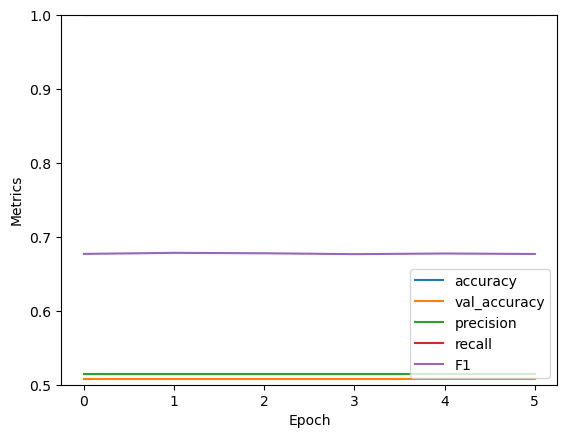

Next fold
Score for fold 1: loss of 7.6678876876831055; accuracy of 50.74999928474426%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/200
25/25 [==============================] - 111s 4s/step - loss: 7.4022 - accuracy: 0.4906 - f1_m: 0.6720 - precision_m: 0.5081 - recall_m: 1.0000 - val_loss: 7.6701 - val_accuracy: 0.4825 - val_f1_m: 0.6725 - val_precision_m: 0.5089 - val_recall_m: 1.0000
Epoch 2/200
25/25 [==============================] - 108s 4s/step - loss: 7.6693 - accuracy: 0.4919 - f1_m: 0.6707 - precision_m: 0.5081 - recall_m: 1.0000 - val_loss: 7.6701 - val_accuracy: 0.4825 - val_f1_m: 0.6725 - val_precision_m: 0.5089 - val_recall_m: 1.0000
Epoch 3/200
25/25 [==============================] - 109s 4s/step - loss: 7.6693 - accuracy: 0.4919 - f1_m: 0.6714 - precision_m: 0.5081 - recall_m: 1.0000 - val_loss: 7.6701 - val_accuracy: 0.4825 - val_f1_m: 0.6725 - val_precision_m: 0.5089 - val_recall_m: 1.0000
Epoch 4/200
25/25 

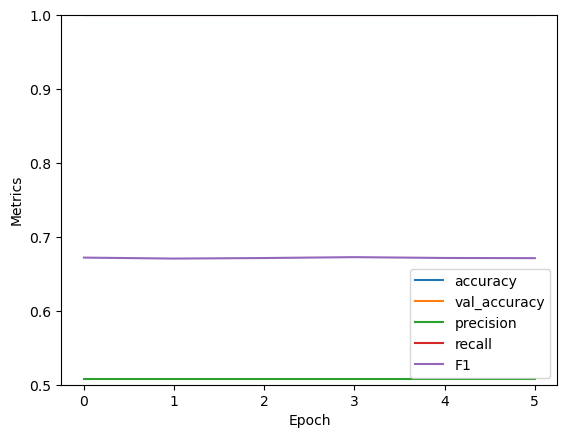

Next fold
Score for fold 2: loss of 7.670083999633789; accuracy of 48.249998688697815%
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/200
25/25 [==============================] - 113s 5s/step - loss: 7.4045 - accuracy: 0.4994 - f1_m: 0.6629 - precision_m: 0.4981 - recall_m: 1.0000 - val_loss: 7.6736 - val_accuracy: 0.5575 - val_f1_m: 0.7060 - val_precision_m: 0.5513 - val_recall_m: 1.0000
Epoch 2/200
25/25 [==============================] - 111s 4s/step - loss: 7.6684 - accuracy: 0.4981 - f1_m: 0.6623 - precision_m: 0.4981 - recall_m: 1.0000 - val_loss: 7.6736 - val_accuracy: 0.5575 - val_f1_m: 0.7060 - val_precision_m: 0.5513 - val_recall_m: 1.0000
Epoch 3/200
25/25 [==============================] - 109s 4s/step - loss: 7.6684 - accuracy: 0.4981 - f1_m: 0.6633 - precision_m: 0.4981 - recall_m: 1.0000 - val_loss: 7.6736 - val_accuracy: 0.5575 - val_f1_m: 0.7060 - val_precision_m: 0.5513 - val_recall_m: 1.0000
Epoch 4/200
25/25 

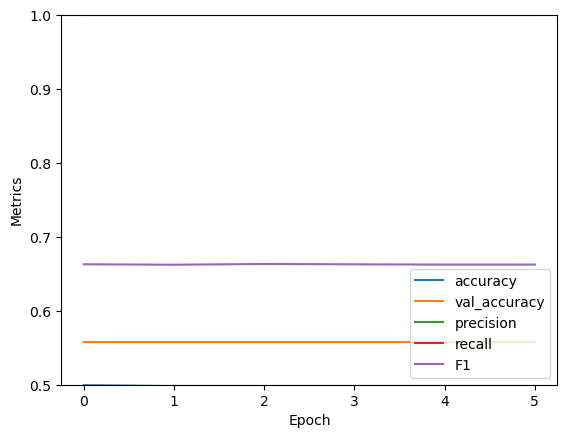

Next fold
Score for fold 3: loss of 7.673597812652588; accuracy of 55.75000047683716%
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/200
25/25 [==============================] - 113s 5s/step - loss: 7.4277 - accuracy: 0.5125 - f1_m: 0.6777 - precision_m: 0.5144 - recall_m: 1.0000 - val_loss: 7.6679 - val_accuracy: 0.4925 - val_f1_m: 0.6526 - val_precision_m: 0.4866 - val_recall_m: 1.0000
Epoch 2/200
25/25 [==============================] - 111s 4s/step - loss: 7.6698 - accuracy: 0.5144 - f1_m: 0.6768 - precision_m: 0.5144 - recall_m: 1.0000 - val_loss: 7.6679 - val_accuracy: 0.4925 - val_f1_m: 0.6526 - val_precision_m: 0.4866 - val_recall_m: 1.0000
Epoch 3/200
25/25 [==============================] - 109s 4s/step - loss: 7.6698 - accuracy: 0.5144 - f1_m: 0.6776 - precision_m: 0.5144 - recall_m: 1.0000 - val_loss: 7.6679 - val_accuracy: 0.4925 - val_f1_m: 0.6526 - val_precision_m: 0.4866 - val_recall_m: 1.0000
Epoch 4/200
25/25 [

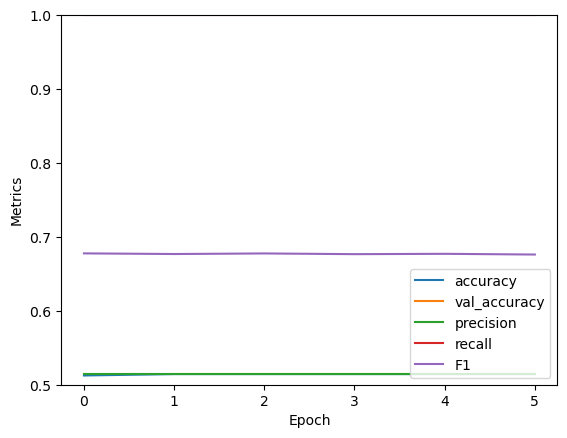

Next fold
Score for fold 4: loss of 7.667888164520264; accuracy of 49.25000071525574%
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/200
25/25 [==============================] - 114s 5s/step - loss: 7.5027 - accuracy: 0.4975 - f1_m: 0.6777 - precision_m: 0.5150 - recall_m: 1.0000 - val_loss: 7.6677 - val_accuracy: 0.5100 - val_f1_m: 0.6762 - val_precision_m: 0.5179 - val_recall_m: 1.0000
Epoch 2/200
25/25 [==============================] - 109s 4s/step - loss: 7.6699 - accuracy: 0.4850 - f1_m: 0.6783 - precision_m: 0.5150 - recall_m: 1.0000 - val_loss: 7.6677 - val_accuracy: 0.5100 - val_f1_m: 0.6762 - val_precision_m: 0.5179 - val_recall_m: 1.0000
Epoch 3/200
25/25 [==============================] - 116s 5s/step - loss: 7.6699 - accuracy: 0.4850 - f1_m: 0.6783 - precision_m: 0.5150 - recall_m: 1.0000 - val_loss: 7.6677 - val_accuracy: 0.5100 - val_f1_m: 0.6762 - val_precision_m: 0.5179 - val_recall_m: 1.0000
Epoch 4/200
25/25 [

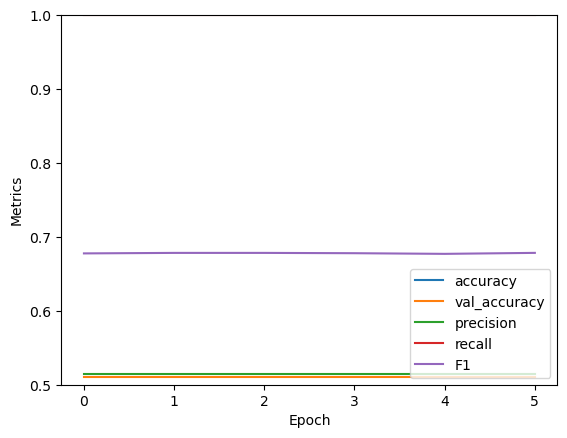

Next fold
Score for fold 5: loss of 7.667667865753174; accuracy of 50.999999046325684%


In [27]:
#Setting early stopping
earlystopping=callbacks.EarlyStopping(monitor="val_loss", mode="min",patience=5,restore_best_weights=True)
lrScheduler=callbacks.LearningRateScheduler(scheduler)
#Conv
fold_no = 1
for train, test in kf.split(x, y):
    model = models.Sequential()
    model.add(layers.Conv1D(512,1, padding='valid',strides=1, #kernel_initializer=high_pass, #Comment if unwanted kernel
                          input_shape=(512,channels)))
    model.add(layers.MaxPooling1D((2)))
    model.add(layers.Conv1D(1024, 2))
    #model.add(layers.MaxPooling2D((2, 2)))
   # model.add(layers.Conv2D(512, (3, 3), activation='relu'))
   #  model.add(layers.MaxPooling2D((2, 2)))
    #model.add(layers.Conv2D(1024, (3, 3), activation='relu'))
    #Dense
    model.add(layers.Flatten())#, activation='relu'
    model.add(layers.Dense(1024))
    model.add(layers.Dense(512))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128))
    model.add(layers.Dense(2, activation='softmax'))
    #Comp
    #customSGD=tf.optimizers.SGD(learning_rate=0.05) #SGD consume más recursos computacionales, además puede tardar más tiempo optimizando
    customAdam=tf.optimizers.Adam(learning_rate=0.0015)
    model.compile(optimizer=customAdam,
                  loss=tf.keras.losses.binary_crossentropy, #Debería ser binario?
                  metrics=['accuracy',f1_m,precision_m, recall_m])
        # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    #Fitting
    history = model.fit(x[train], y[train],validation_data=(x[test], y[test]), epochs=200, callbacks=[earlystopping,lrScheduler],batch_size=64)
    gc.collect()
    print("\n\n\n\n\nFitted")
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    test_loss, test_acc,f1_score, precision, recall = model.evaluate(x[test], y[test], verbose=2)
    print("Loss:",test_loss, "\nAccuracy:",test_acc,"\nF1 score:",f1_score, "\nPrecision:",precision, "\nRecall",recall)
        
    plt.plot(history.history['precision_m'], label='precision')
    plt.plot(history.history['recall_m'], label = 'recall')
    plt.plot(history.history['f1_m'], label = 'F1')
    plt.xlabel('Epoch')
    plt.ylabel('Metrics')
    plt.legend(loc='lower right')
    plt.show()
    print("Next fold")
    #dataMqtt={"Fold":str(fold_no),"timestamp":str(datetime.now()),"Loss":str(test_loss), "Acc":str(test_acc),"F1":str(f1_score),"Precision":str( precision),"Recall": str(recal)}
    #dataMqtt_out=json.dumps(data)
    #retMqtt= client1.publish("stegian/data",dataMqtt_out)
    
    # Generate generalization metrics
    scores = model.evaluate(x[test], y[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    
    # Increase fold number
    fold_no += 1
    gc.collect()

## 

In [ ]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

# **4. Agregar capas densas en la parte superior**

In [ ]:
model.summary()

# **5. Compilar y entrenar el modelo**



In [ ]:
model.save("Mono_Attr_noHPf_WOW5-V3.h5")

# **6. Evaluar el modelo**